In [1]:
from Bio import SeqIO
import pandas as pd
import torch
from tape import ProteinBertModel, TAPETokenizer
from Bio.Alphabet import IUPAC
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import torch
from tape import ProteinBertModel, TAPETokenizer
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')

lookup_d = {}
for record in SeqIO.parse("deeploc_data.fasta", "fasta"):
    description = record.description
    seq = record.seq
    desc_split = description.split(" ")
    if len(desc_split) == 3:
        ID = desc_split[0]
        label = desc_split[1]
        label = label[:len(label)-2]
        lookup_d[ID] = label
    
    else:
        ID = desc_split[0]
        label = desc_split[1]
        label = label[:len(label)-2]
        lookup_d[ID] = label


In [2]:
import numpy as np
import pandas as pd
import json
arrays = np.load('output_full.npz', allow_pickle=True)

l = list(arrays.keys()) 

In [3]:
deeploc_df = pd.DataFrame()
label_df = pd.DataFrame(columns=['ID', 'label'])
for a in l:
    d = arrays[a].item()['avg']
    df = pd.DataFrame(d)
    label_df = label_df.append({"ID":a, "label": lookup_d[a]}, ignore_index=True)
    deeploc_df = deeploc_df.append(df.transpose(), ignore_index=True)

In [27]:
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
pca = PCA(n_components=300)

principalComponents = pca.fit_transform(deeploc_df)
print(sum(pca.explained_variance_ratio_))
# tsneComponents = tsne.fit_transform(deeploc_df)

0.9785955163315047


In [15]:
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

tsne_df = pd.DataFrame(data=tsneComponents, columns=['tsne1', 'tsne2', 'tsne3'])

In [16]:
principal_df['ID'] = label_df['ID']
principal_df['label'] = label_df['label']

tsne_df['ID'] = label_df['ID']
tsne_df['label'] = label_df['label']


In [7]:
principal_df

pc1       pc2       pc3      ID                  label
0    -3.785696  3.183432  3.369545  P83585                Plastid
1    -3.962483  3.689285  4.857976  P12100          Extracellular
2    -2.999231 -0.460244  1.221897  Q8GUU3                Nucleus
3    -3.201531  1.562028  3.228615  P25379          Mitochondrion
4    -3.467626 -0.842375  2.771390  P19882          Mitochondrion
...        ...       ...       ...     ...                    ...
6189  0.125758 -0.585824 -1.191702  Q9FMD7          Cell.membrane
6190  2.077720 -2.494203  0.908175  Q9LDN0              Cytoplasm
6191  5.739468  2.096934  0.103104  Q8N7E2              Cytoplasm
6192 -2.710245  1.903207  1.856485  P85971              Cytoplasm
6193 -2.597038 -0.924763 -1.963556  Q9Y7Y0  Endoplasmic.reticulum

[6194 rows x 5 columns]

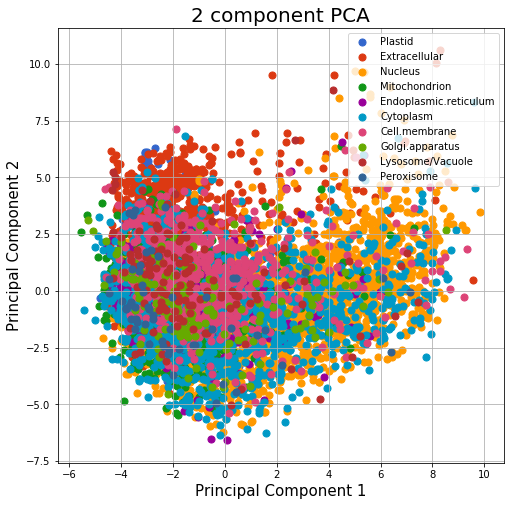

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(label_df['label'].unique())
colors =px.colors.qualitative.G10
for target, color in zip(targets,colors):
    indicesToKeep = principal_df['label'] == target
    ax.scatter(principal_df.loc[indicesToKeep, 'pc1']
               , principal_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [10]:
import plotly.graph_objects as go
import seaborn as sns

In [11]:
import plotly.express as px
plt.figure(figsize=(25, 25))
fig = px.scatter(principal_df, x='pc1', y='pc2',
              color='label', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

<Figure size 1800x1800 with 0 Axes>

In [12]:
import plotly.express as px
plt.figure(figsize=(1800,1800))
fig = px.scatter_3d(principal_df, x='pc1', y='pc2', z='pc3',
              color='label', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1542a0680> (for post_execute):


ValueError: Image size of 129600x129600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 129600x129600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(label_df['label'].unique())
print(len(targets))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '0.25', '0.5', '0.75', '0.9']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['label'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'tsne1']
               , tsne_df.loc[indicesToKeep, 'tsne2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
import plotly.express as px
plt.figure(figsize=(25, 25))
fig = px.scatter(tsne_df, x='tsne1', y='tsne2',
              color='label', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

<Figure size 1800x1800 with 0 Axes>

In [ ]:
2